In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
movie_df = pickle.load(open('processed_movie_df.pickle', 'rb'))
#movie_df = movie_df[movie_df.release.apply(lambda x: x.year>2009)]

In [17]:
columns_to_drop=['link_stub', 'release','desc', 'distr', 'opening', 'runtime',
       'genres', 'roi', 'gross_dom', 'gross_inter', 'gross_world',
       'Director', 'Writer', 'Producer', 'Composer', 'Cinematographer',
       'Editor', 'Production Designer', 'Actors']
movie_df.columns

"""'Director_portfolio', 'budget_Director',
       'gross_dom_Director', 'distr_portfolio', 'budget_distr',
       'gross_dom_distr', 'Composer_portfolio', 'budget_Composer',
       'gross_dom_Composer', 'Cinematographer_portfolio',
       'budget_Cinematographer', 'gross_dom_Cinematographer',
       'Editor_portfolio', 'budget_Editor', 'gross_dom_Editor',
       'Production Designer_portfolio', 'budget_Production Designer',
       'gross_dom_Production Designer', 'Writer_portfolio', 'budget_Writer',
       'gross_dom_Writer', 'Producer_portfolio', 'budget_Producer',
       'gross_dom_Producer', 'Actors_portfolio', 'budget_Actors',
       'gross_dom_Actors'"""

"'Director_portfolio', 'budget_Director',\n       'gross_dom_Director', 'distr_portfolio', 'budget_distr',\n       'gross_dom_distr', 'Composer_portfolio', 'budget_Composer',\n       'gross_dom_Composer', 'Cinematographer_portfolio',\n       'budget_Cinematographer', 'gross_dom_Cinematographer',\n       'Editor_portfolio', 'budget_Editor', 'gross_dom_Editor',\n       'Production Designer_portfolio', 'budget_Production Designer',\n       'gross_dom_Production Designer', 'Writer_portfolio', 'budget_Writer',\n       'gross_dom_Writer', 'Producer_portfolio', 'budget_Producer',\n       'gross_dom_Producer', 'Actors_portfolio', 'budget_Actors',\n       'gross_dom_Actors'"

In [21]:
X = movie_df.drop(columns=columns_to_drop)
y = movie_df.roi

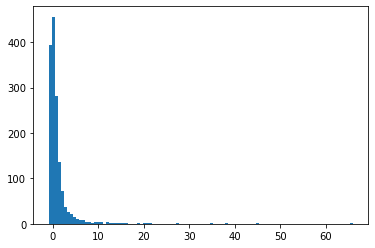

In [191]:
plt.hist(y[:-500], bins=100);

In [4]:
movie_df.drop(columns='link_stub', inplace=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [249]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

#terrible score! 
lr.score(X_train, y_train)

0.11942498953866154

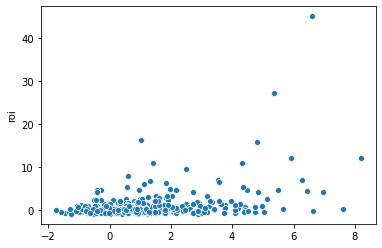

In [337]:
sns.scatterplot(y_preds, y_test);

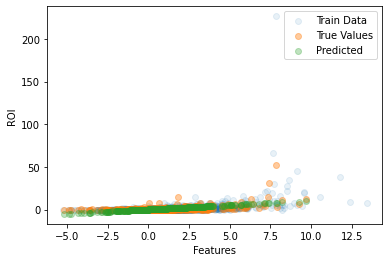

In [33]:
plot_x = (X_test*lr.coef_).sum(axis=1)
plot_x2 = (X_train*lr.coef_).sum(axis=1)
d=1
plt.scatter(plot_x2, y_train**d, alpha=0.1, label='Train Data')
plt.scatter(plot_x, y_test**d, alpha=0.4, label='True Values')
plt.scatter(plot_x, y_preds**d, alpha=0.3, label='Predicted')
plt.ylabel('ROI')
plt.xlabel('Features')
plt.legend();

Text(0.5, 1.0, 'Distribution of ROI for Movies')

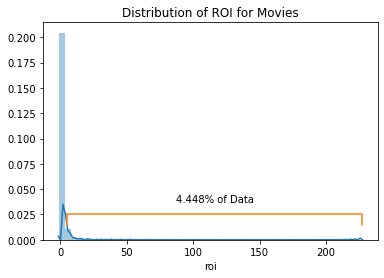

In [196]:
n = 5
r_df = movie_df.roi
sns.distplot(r_df)

x1, x2 = n, 227
y1 = 0.025
h=0.01
plt.plot([x1, x1, x2, x2], [y1-h, y1, y1, y1-h]) #create bracket
plt.text(x=(x1+x2)*.5, 
         y=y1+h, 
         s="{:.3f}% of Data".format(100*len(r_df[r_df>n])/len(r_df)), 
         ha='center', va='bottom'); #create label
plt.title('Distribution of ROI for Movies')

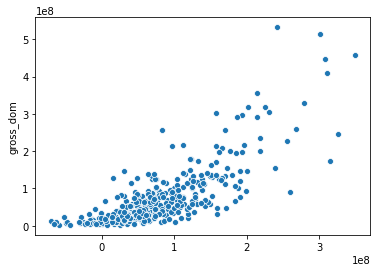

In [70]:
sns.scatterplot(y_preds, y_test)

In [61]:
from sklearn import metrics

In [130]:
metrics.mean_absolute_error(y_test, y_preds)

37953275.50924779

In [131]:
metrics.mean_squared_error(y_test, y_preds)

3020811734017987.5

In [132]:
np.sqrt(metrics.mean_squared_error(y_test, y_preds))

54961911.666334786

In [28]:
lr.coef_

array([ 5.18833332e-04, -8.99484579e-04, -2.46990015e-03, -5.22145728e-03,
       -1.26735053e-03, -3.97567649e-03,  4.53923424e-03,  5.41923509e-03,
       -2.26372303e-03,  1.14853219e-01,  3.97587049e-02, -3.99113849e-01,
       -2.44211967e-01, -1.71673819e-01,  1.57560425e-01,  7.80501304e-02,
       -5.20027102e-02,  1.48500227e+00, -8.85188454e-04, -8.96526824e-02,
       -2.75191798e-01, -2.00871568e-01,  3.84444690e-01,  5.24320273e-01,
       -6.48410562e-02, -7.23043771e-02,  1.26905030e-02, -2.07057329e-01,
       -1.00981304e-01, -5.28859377e-02, -1.37866219e-01, -5.28679932e-01,
       -3.67521451e-01, -5.44892811e-01, -6.35556260e-01, -5.58342300e-01])

In [175]:
pd.DataFrame(lr.coef_, X.columns)

,0
theaters,3.258610e+07
budget,2.919951e+07
runtime,1.644918e+07
holiday_distance,-4.629124e+05
distr_portfolio,-4.481337e+06
Cinematographer_portfolio,4.344781e+06
Production Designer_portfolio,-9.030054e+05
Writer_portfolio,6.426169e+06
Producer_portfolio,1.052071e+07
Action,-6.127401e+06


In [87]:
lr.score(X_train, y_train)

0.5645904062531868

In [58]:
X.columns

Index(['theaters', 'runtime', 'holiday_distance', 'Director_portfolio',
       'distr_portfolio', 'Composer_portfolio', 'Cinematographer_portfolio',
       'Editor_portfolio', 'Production Designer_portfolio', 'Writer_portfolio',
       'Producer_portfolio', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'mpaa_G', 'mpaa_PG',
       'mpaa_PG-13', 'mpaa_R'],
      dtype='object')

In [59]:
X=X[['Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.0677266756983751

# Attempting to use Mean Shift Clustering to Sort Categorical Data

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [218]:
movie_df.columns

Index(['link_stub', 'release', 'theaters', 'runtime', 'holiday_distance',
       'Director_portfolio', 'distr_portfolio', 'Composer_portfolio',
       'Cinematographer_portfolio', 'Editor_portfolio',
       'Production Designer_portfolio', 'Writer_portfolio',
       'Producer_portfolio', 'roi', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'mpaa_G',
       'mpaa_PG', 'mpaa_PG-13', 'mpaa_R'],
      dtype='object')

In [34]:
teams = ['Director_portfolio', 'distr_portfolio', 'Composer_portfolio',
       'Cinematographer_portfolio', 'Editor_portfolio',
       'Production Designer_portfolio', 'Writer_portfolio',
       'Producer_portfolio']

In [36]:
#team_df = movie_df[movie_df.roi<n][teams]
team_df = movie_df[teams]

In [37]:
bandwidth = estimate_bandwidth(team_df, quantile=0.2)

In [38]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(team_df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('number of estimated clusters : %d' % n_clusters_)

number of estimated clusters : 9


In [39]:
team_df['team_clusters'] = labels

<ipython-input-39-3bfc99ab5941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_df['team_clusters'] = labels


In [40]:
X = movie_df.merge(team_df.team_clusters, left_index=True, right_index=True)

In [41]:
X.columns

Index(['link_stub', 'release', 'theaters', 'budget', 'runtime', 'gross_dom',
       'holiday_distance', 'Director_portfolio', 'distr_portfolio',
       'Composer_portfolio', 'Cinematographer_portfolio', 'Editor_portfolio',
       'Production Designer_portfolio', 'Writer_portfolio',
       'Producer_portfolio', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'mpaa_G', 'mpaa_PG',
       'mpaa_PG-13', 'mpaa_R', 'team_clusters'],
      dtype='object')

In [42]:
y = X.gross_dom
X = X[['theaters', 'runtime', 'holiday_distance', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'mpaa_G',
       'mpaa_PG', 'mpaa_PG-13', 'mpaa_R', 'team_clusters', 'budget']]

In [43]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5546054744208286

# Try Polynomial Fit

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [350]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

"""#Use this if you want to reduce variability in results. 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
"""

degree = 2
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

est.fit(X_train, y_train)

est.score(X_train, y_train)

0.6682133932960929

In [306]:
y_preds = est.predict(X_test)

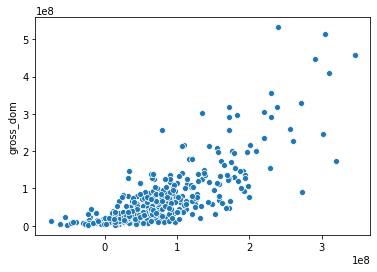

In [349]:
sns.scatterplot(y_preds, y_test)

In [113]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MSE = metrics.mean_squared_error(y_test, y_preds)
RMSE = MSE**.5
print('MAE = %.3f' % MAE)
print('MSE = %.3f' % MSE)
print('RMSE = %.3f' % RMSE)

MAE = 47872969805824573440.000
MSE = 22573944826252644059870729154995538624512.000
RMSE = 150246280573772103680.000


In [191]:
metrics.mean_squared_error(y_test, y_preds)

3.573062410787273

In [199]:
est.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

# Try with Stats Models

In [94]:
movie_df.head()

,link_stub,release,theaters,budget,runtime,gross_dom,holiday_distance,Director_portfolio,distr_portfolio,Composer_portfolio,...,Romance,Sci-Fi,Sport,Thriller,War,Western,mpaa_G,mpaa_PG,mpaa_PG-13,mpaa_R
title,,,,,,,,,,,,,,,,,,,,,
Sin City,/release/rl3027338753/?ref_=bo_yld_table_32,2005-04-01,3230,40000000,124.0,74103820,39,1,13,1,...,0,0,0,1,0,0,0,0,0,1
The Powerpuff Girls Movie,/release/rl1164674561/?ref_=bo_yld_table_150,2002-07-03,2340,11000000,73.0,11412414,1,1,292,7,...,0,1,0,0,0,0,0,1,0,0
Fly Me to the Moon 3D,/release/rl391284225/?ref_=bo_yld_table_143,2008-08-15,713,25000000,84.0,13816982,17,1,19,13,...,0,0,0,0,0,0,1,0,0,0
Heist,/release/rl3327559169/?ref_=bo_yld_table_96,2001-11-09,1891,39000000,109.0,23510841,2,2,292,50,...,0,0,0,1,0,0,0,0,0,1
Pan,/release/rl3177809409/?ref_=bo_yld_table_74,2015-10-09,3515,150000000,111.0,35088320,3,2,292,50,...,0,0,0,0,0,0,0,1,0,0


In [253]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [254]:
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gross_dom   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     57.15
Date:                Fri, 02 Oct 2020   Prob (F-statistic):          9.98e-260
Time:                        18:03:06   Log-Likelihood:                -30867.
No. Observations:                1600   AIC:                         6.181e+04
Df Residuals:                    1562   BIC:                         6.201e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
theaters                       4.191e+04   2785.839     15.045      0.000    3.64e+04    4.74e+04
budget                            0.5969      0.050     11.906      0.000       0.499       0.695
runtime                        9.166e+05   1.16e+05      7.908      0.000    6.89e+05    1.14e+06
holiday_distance              -3.379e+04   1.27e+05     -0.266      0.790   -2.83e+05    2.15e+05
Director_portfolio            -1.176e+05   6.76e+05     -0.174      0.862   -1.44e+06    1.21e+06
distr_portfolio               -4.861e+04    1.6e+04     -3.037      0.002      -8e+04   -1.72e+04
Composer_portfolio             3.647e+04   1.09e+05      0.335      0.738   -1.77e+05     2.5e+05
Cinematographer_portfolio       2.79e+05   1.18e+05      2.357      0.019    4.68e+04    5.11e+05
Editor_portfolio                3.56e+04   5.97e+05      0.060      0.952   -1.14e+06    1.21e+06
Production Designer_portfolio -1.054e+05   2.24e+05     -0.470      0.638   -5.45e+05    3.34e+05
Writer_portfolio               6.884e+06   1.74e+06      3.951      0.000    3.47e+06    1.03e+07
Producer_portfolio             5.009e+06   7.53e+05      6.652      0.000    3.53e+06    6.49e+06
roi                            1.425e+06   2.29e+05      6.227      0.000    9.76e+05    1.87e+06
Action                        -1.159e+07   4.24e+06     -2.731      0.006   -1.99e+07   -3.26e+06
Adventure                      8.548e+05   4.58e+06      0.186      0.852   -8.14e+06    9.85e+06
Animation                      1.433e+07   8.86e+06      1.617      0.106   -3.05e+06    3.17e+07
Biography                     -4.728e+06   7.91e+06     -0.597      0.550   -2.03e+07    1.08e+07
Comedy                        -5.689e+06   4.33e+06     -1.313      0.190   -1.42e+07    2.81e+06
Crime                          1.075e+06   4.62e+06      0.233      0.816   -7.98e+06    1.01e+07
Documentary                     5.59e+06   2.36e+07      0.237      0.813   -4.07e+07    5.19e+07
Drama                         -4.388e+06   3.88e+06     -1.130      0.259    -1.2e+07    3.23e+06
Family                        -1.845e+07   9.23e+06     -1.999      0.046   -3.66e+07   -3.47e+05
Fantasy                        1.334e+06   4.64e+06      0.288      0.774   -7.76e+06    1.04e+07
History                       -2.169e+07   9.47e+06     -2.291      0.022   -4.03e+07   -3.12e+06
Horror                        -2.084e+06   5.65e+06     -0.368      0.713   -1.32e+07    9.01e+06
Music                          8.293e+06   8.49e+06      0.977      0.329   -8.36e+06    2.49e+07
Musical                        1.816e+07   1.08e+07      1.681      0.093   -3.03e+06    3.94e+07
Mystery                       -6.377e+06   5.09e+06     -1.253      0.210   -1.64e+07     3.6e+06
Romance                       -5.243e+06   4.

Try Ridge

In [267]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.pipeline import Pipeline

In [284]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train.values)
X_te = scaler.transform(X_test.values)

In [265]:
#try to find best alpha manually
alphalist = 10**np.linspace(-2,2,200)

err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

In [268]:
for i, curr_alpha in enumerate(alphalist):
    steps = [('standardize', StandardScaler()),
            ('ridge', Ridge(alpha = curr_alpha))]
    
    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_test.values)
    err_vec_val[i] = np.mean(np.abs(y_test-val_set_pred))

In [269]:
np.min(err_vec_val)

33792727.2929817

In [270]:
alphalist[np.argmin(err_vec_val)]

100.0

In [285]:
#try with ridge now: 
lr_ridge = Ridge(alpha=100)
lr_ridge.fit(X_tr, y_train)

Ridge(alpha=100)

In [278]:
list(zip(X_train.columns, lr_ridge.coef_));

In [286]:
#r score doesn't change much
lr_ridge.score(X_tr, y_train)

0.573809519043227

In [288]:
y_ridge_preds = lr_ridge.predict(X_te)

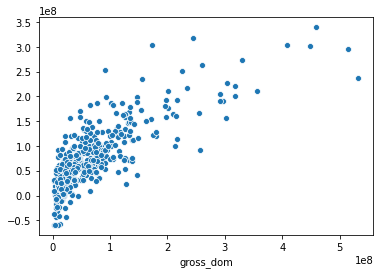

In [289]:
sns.scatterplot(y_test, y_ridge_preds)

In [351]:
x_ridge_transform = (X_te*lr_ridge.coef_).sum(axis=1)
x2_ridge_transform = (X_tr*lr_ridge.coef_).sum(axis=1)

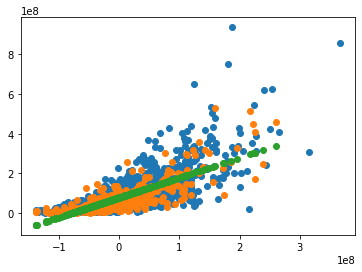

In [356]:
plt.scatter(x2_ridge_transform, y_train)
plt.scatter(x_ridge_transform, y_test)
plt.scatter(x_ridge_transform, y_ridge_preds)

In [302]:
len(y_test)

401

In [312]:
#try with RidgeCV

In [321]:
alphavec = 10**np.linspace(-2,2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train);

In [322]:
ridge_model.alpha_

100.0

In [323]:
from sklearn.linear_model import Lasso, LassoCV

In [327]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train);

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0335112005704909e+17, tolerance: 973983789876210.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0335090237388646e+17, tolerance: 973983789876210.5
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0877491153712282e+17, tolerance: 1040713953030289.2
  model = cd_fast.enet_coordinate_descent_gram(
/Users/andrew/opt/anaconda3/lib/python3

In [328]:
lasso_model.score(X_tr, y_train)

0.5751388102829011